## EDEP SIMULATION ANALYSIS ## 

*The objective of this script is to analyze the trajectories for different kinds of events obtained through a Monte-Carlo simulation.*

The data is located in a ".hdf5" file which contains all the raw data in a no array-like structure. The data is set different from each other using the numpy datatype method. The contents of the file have five different kind of main distinc arangements:
- mc_hdr
- mc_stack
- segments
- trajectories
- vertices

On each, the data can be contrasted from other using the dtype method. 

**NOTE**: I'm using the NDLAR simulation converted to hdf5 file from local.

### Let's start the program ###

In [7]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
#Let's import the file:
sim_file='/home/enrique/Documents/WorkStuff/Work1/MicroProdN1p2_NDLAr_1E18_RHC.convert2h5.nu.0000100.EDEPSIM.hdf5'
sim_h5= h5py.File(sim_file,'r')
#And observe the file contents.
print('\n----------------- File content -----------------')
print('File:',sim_file)
print('Keys in file:',list(sim_h5.keys()))
for key in sim_h5.keys():
    print('Number of',key,'entries in file:', len(sim_h5[key]))
print('------------------------------------------------\n')


----------------- File content -----------------
File: /home/enrique/Documents/WorkStuff/Work1/MicroProdN1p2_NDLAr_1E18_RHC.convert2h5.nu.0000100.EDEPSIM.hdf5
Keys in file: ['mc_hdr', 'mc_stack', 'segments', 'trajectories', 'vertices']
Number of mc_hdr entries in file: 2040
Number of mc_stack entries in file: 19137
Number of segments entries in file: 6582081
Number of trajectories entries in file: 4369814
Number of vertices entries in file: 2040
------------------------------------------------



In [8]:
# The number of vertices and mc_hdr coincides with the number of events on the original root file.

#Let's split the data per key and see what's inside of each 

mc_hdr = sim_h5['mc_hdr']
mc_stack = sim_h5['mc_stack']
segments = sim_h5['segments']
trajectories = sim_h5['trajectories']
vertices= sim_h5['vertices']

#Now let's see what's inside of each:
print("Inside the mc_hdr we find: ")
print(mc_hdr.dtype)
print("")
print("Inside the mc_stack we find: ")
print(mc_stack.dtype)
print("")
print("Inside the segments we find: ")
print(segments.dtype)
print("")
print("Inside the trajectories we find: ")
print(trajectories.dtype)
print("")
print("Inside the vertices we find: ")
print(vertices.dtype)
print("")

Inside the mc_hdr we find: 
{'names': ['event_id', 'vertex_id', 'x_vert', 'y_vert', 'z_vert', 't_vert', 'target', 'reaction', 'isCC', 'isQES', 'isMEC', 'isRES', 'isDIS', 'isCOH', 'Enu', 'nu_4mom', 'nu_pdg', 'Elep', 'lep_mom', 'lep_ang', 'lep_pdg', 'q0', 'q3', 'Q2', 'x', 'y'], 'formats': ['<u4', '<u8', '<f4', '<f4', '<f4', '<f8', '<u4', '<i4', '?', '?', '?', '?', '?', '?', '<f4', ('<f4', (4,)), '<i4', '<f4', '<f4', '<f4', '<i4', '<f4', '<f4', '<f4', '<f4', '<f4'], 'offsets': [0, 8, 16, 20, 24, 32, 40, 44, 48, 49, 50, 51, 52, 53, 56, 60, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112], 'itemsize': 120}

Inside the mc_stack we find: 
{'names': ['event_id', 'vertex_id', 'traj_id', 'part_4mom', 'part_pdg', 'part_status'], 'formats': ['<u4', '<u8', '<i4', ('<f4', (4,)), '<i4', '<i4'], 'offsets': [0, 8, 16, 20, 36, 40], 'itemsize': 48}

Inside the segments we find: 
{'names': ['event_id', 'vertex_id', 'segment_id', 'z_end', 'traj_id', 'file_traj_id', 'tran_diff', 'z_start', 'x_end', 'y_end', 'n_e

If we want to reproduce the results obtained using the "edepdisplay.cpp" code, we would like to focus ond the trajectories to distinguish particles between each other. Also we would like to focus on the deposition of energy on the segments dataset.

In [43]:
# Let's create a dictiorary that will dictate the color assigned to each particle.
# This will come in handy later on the scipt
pdg_color = { 
11 : 'blue', #electron
13 : 'purple', #muon
22 :  'yellow', #gamma
2212:  'black', #proton
2112:  'gray', #neutron
111:   'pink', #pi0
211:   'cyan', #pi+
0: 'red',
11: 'blue', #positron
#14: 'green' # muon neutrino
}

# Let's analyze just one event. 
trajE0 = trajectories[trajectories['vertex_id']== 1000000001]
print("The amount of hit points of this event is: ", len(trajE0))
print(trajE0)
print(trajE0.dtype.names)
print(trajE0[np.abs(trajE0['pdg_id'])==13])

The amount of hit points of this event is:  395
[(100000, 1000000001,   0, 371,  -1,  True, 1.28750694e+00, [ 4.84343320e-01,  2.07436100e-01,  1.17475772e+00], [-186.64621 , -128.37065 ,  812.28033 ],  0.45689162, 1.4901161e-08, [-0.        ,  0.        , -0.        ], [-198.38936  , -130.90152  ,  832.91693  ],  0.45839521,         22, 1,  91, 2,  12, 4.50763397e+01)
 (100000, 1000000001,   1, 372,  -1,  True, 2.06807690e+03, [-3.84239166e+02, -2.43192245e+02,  2.01469519e+03], [-186.64621 , -128.37065 ,  812.28033 ],  0.45689162, 1.0565837e+02, [-0.        , -0.        ,  0.        ], [-332.94968  , -187.88142  , 1476.3257   ],  6.80472337,        -13, 4, 111, 2,  22, 6.85234802e+02)
 (100000, 1000000001,   2, 373,  -1,  True, 1.10137256e+03, [ 2.91123962e+02, -2.50271034e+01,  4.94832153e+02], [-186.64621 , -128.37065 ,  812.28033 ],  0.45689162, 9.3956537e+02, [ 0.        , -0.        ,  0.        ], [-183.75575  , -128.61914  ,  817.19336  ],  0.45725638,       2112, 4, 111, 4, 1

To reconstruc the trajectory of a particle, we need to couple together the xyz_start and xyz_end in an array and graph those points joint together by a line, just those two points. We can also compare with the xyz_end as a scatter plot to see if it makes sense.

First we need to filter the data to the specific particles that interest us, those are the ones inside the pdg_color. 

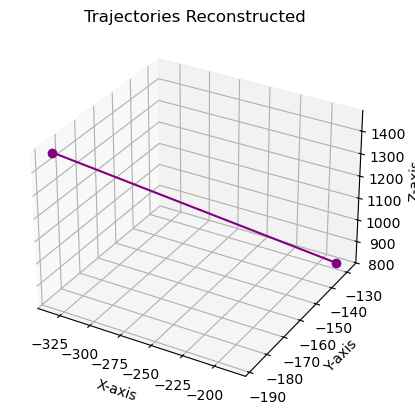

In [45]:
labels = pdg_color.keys()

#If needed, here's some lines to clarify the data structure. 
#for points in trajE0:
#    print(points['xyz_start'], points['xyz_end'], points['pdg_id'])

#for points in trajE0:
#    if len(str(np.abs(points['pdg_id'])))> 4:
#        print(points['pdg_id'])
#There's some nucleus identifiers that are the ones that have no keytraceback to the pdg that we declared and those aren't useful
# to us at this moment.

#Now we can plot in 3d the trajectory of the particles.

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title("Trajectories Reconstructed")

for points in trajE0:

#Here we take every row that was printed before in the trajE0 grab the coordinates from the start and the end and just
#plot those two points per each x,y,z coordinate and then if the ID corresponds to the ones
#inside the labels array then those sets of points are being plotted. We then repeat the process
# for each set of points. 
    x = [points['xyz_start'][0], points['xyz_end'][0]]
    y = [points['xyz_start'][1], points['xyz_end'][1]]
    z = [points['xyz_start'][2], points['xyz_end'][2]]
    if (np.abs(points['pdg_id']) in labels) and (np.abs(points['pdg_id'])==13):
        ax.plot(x,y,z,marker='o',c=pdg_color[np.abs(points['pdg_id'])])
    #ax.plot(x,y,z)
#I cannot use the other line because of all the different values that the points['pdg_id'] has. So previous to this step
# we need to see all the different elements of 
# Let's put everything in just one script.
plt.show()
plt.close()

But we want to compare the lines to the scattered version, in that case we'll do something similar. 

0 22
1 13
2 2112
3 211
4 111
5 11
6 22
7 22
8 22
9 11
10 11
11 22
12 22
13 11
14 11
15 11
16 11
17 22
18 22
19 11
20 11
21 11
22 11
23 11
24 11
25 22
26 22
27 11
28 11
29 11
30 11
31 11
32 11
33 11
34 -11
35 22
36 2112
37 22
38 11
39 11
40 11
41 11
42 11
43 11
44 11
45 11
46 22
47 11
48 11
49 11
50 11
51 22
52 11
53 11
54 11
55 11
56 11
57 2112
58 2112
59 2112
60 11
61 22
62 22
63 2112
64 2112
65 2112
66 2112
67 2112
68 2112
69 2112
70 2112
71 2112
72 2112
73 2112
74 11
75 22
76 22
77 2112
78 2112
79 22
80 2112
81 11
82 11
83 11
84 11
85 11
86 11
87 2112
88 2112
89 2112
90 22
91 11
92 11
93 22
94 11
95 11
96 11
97 11
98 22
99 11
100 11
101 11
102 2112
103 2112
104 2112
105 22
106 11
107 11
108 11
109 11
110 11
111 11
112 2112
113 22
114 2112
115 2112
116 11
117 11
118 11
119 11
120 11
121 11
122 2112
123 22
124 11
125 11
126 11
127 11
128 11
129 11
130 11
131 11
132 11
133 11
134 11
135 11
136 11
137 11
138 22
139 11
140 11
141 11
142 11
143 11
144 22
145 11
146 11
147 11
148 11
149 11

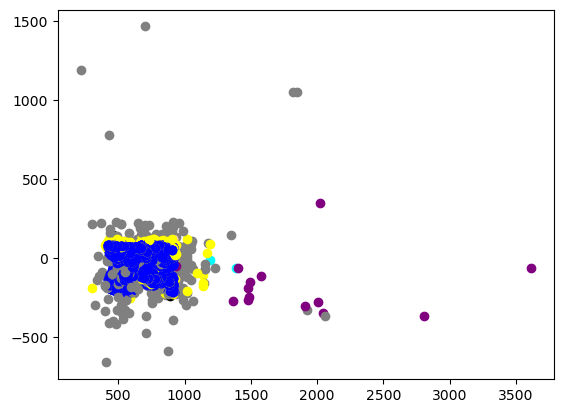

In [11]:

image, ax_s= plt.subplots()
i=0
for points in trajE0:
    
    if np.abs(points['pdg_id']) in labels:
        print(i,points['pdg_id'])
        y_s = [points['xyz_end'][1]]
        z_s = [points['xyz_end'][2]]
        ax_s.scatter(z_s, y_s,c=pdg_color[np.abs(points['pdg_id'])])
        i+=1

plt.show()

We see that the plots coincide with the position scattered. We now need to get the deposited energy info and relate it to a single particle trajectory. Plot both the particle trajectory and save the deposited energy in a histogram.

[(100000, 1000000001, 1, 372, -1,  True, 2068.077, [-384.23917, -243.19225, 2014.6952 ], [-186.64621, -128.37065,  812.28033], 0.45689162, 105.65837, [-0., -0.,  0.], [-332.94968, -187.88142, 1476.3257 ], 6.80472337, -13, 4, 111, 2, 22, 685.2348)]
{'names': ['event_id', 'vertex_id', 'traj_id', 'file_traj_id', 'parent_id', 'primary', 'E_start', 'pxyz_start', 'xyz_start', 't_start', 'E_end', 'pxyz_end', 'xyz_end', 't_end', 'pdg_id', 'start_process', 'start_subprocess', 'end_process', 'end_subprocess', 'dist_travel'], 'formats': ['<u4', '<u8', '<u4', '<u4', '<i4', '?', '<f4', ('<f4', (3,)), ('<f4', (3,)), '<f8', '<f4', ('<f4', (3,)), ('<f4', (3,)), '<f8', '<i4', '<u4', '<u4', '<u4', '<u4', '<f4'], 'offsets': [0, 8, 16, 20, 24, 28, 32, 36, 48, 64, 72, 76, 88, 104, 112, 116, 120, 124, 128, 132], 'itemsize': 136}


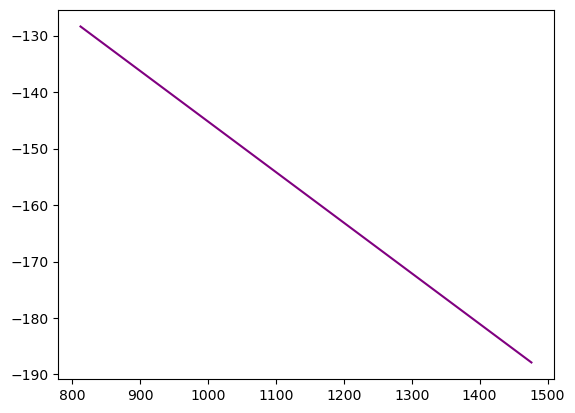

In [46]:
muon0=trajE0[np.abs(trajE0['pdg_id'])==13]
#muon0= muontrajs[muontrajs['traj_id']==0]
print(muon0)
print(muon0.dtype)
imagem, axmuon= plt.subplots()
for points in muon0:
    if np.abs(points['pdg_id']) in labels:
        y = [points['xyz_start'][1],points['xyz_end'][1]]
        z = [points['xyz_start'][2],points['xyz_end'][2]]
        axmuon.plot(z, y,c=pdg_color[np.abs(points['pdg_id'])])

0 22
1 22
2 -13
3 22
4 -13
5 -13
6 22
7 13
8 -13
9 13
10 -13
11 -13
12 13
13 13
14 22
15 -13
16 13
17 13
18 -13
19 -13
20 -13
21 13
22 -13
23 22
24 13
25 13
26 -13
27 22
28 13
29 13
30 13
31 22
32 -13
33 -13
34 22
35 -13
36 -13
37 -13
38 -13
39 -13
40 13
41 -13
42 13
43 -13
44 13
45 -13
46 22
47 -13
48 13
49 13
50 -13
51 -13
52 13
53 -13
54 -13
55 22
56 -13
57 13
58 13
59 13
60 -13
61 13
62 -13
63 13
64 22
65 13
66 13
67 -13
68 22
69 13
70 13
71 22
72 22
73 -13
74 13
75 22
76 -13
77 22
78 -13
79 22
80 -13
81 -13
82 -13
83 22
84 -13
85 -13
86 13
87 13
88 13
89 22
90 -13
91 13
92 13
93 -13
94 -13
95 22
96 22
97 13
98 -13
99 13
100 13
101 -13
102 13
103 -13
104 -11
105 22
106 22
107 22
108 22
109 -13
110 -13
111 22
112 -13
113 22
114 -13
115 13
116 -13
117 -13
118 -13
119 -13
120 22
121 13
122 -13
123 -13
124 -13
125 13
126 13
127 13
128 22
129 -13
130 -13
131 -13
132 -13
133 -13
134 13
135 13
136 -13
137 -13
138 -13
139 -13
140 -13
141 22
142 22
143 -11
144 -13
145 13
146 -13
147 22
148 

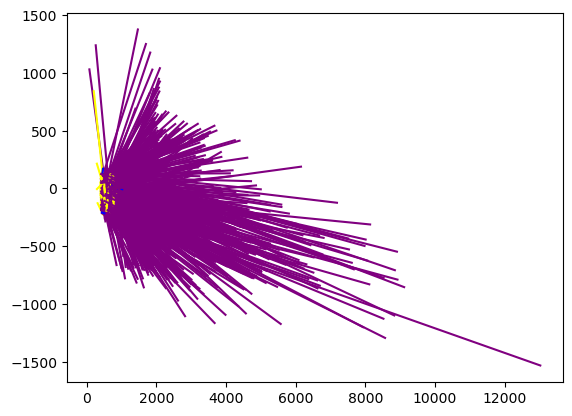

In [36]:
trajt0=trajectories[trajectories['traj_id']== 0]
image, axt= plt.subplots()
i=0
for points in trajt0:
    
    if np.abs(points['pdg_id']) in labels:
        print(i,points['pdg_id'])
        y = [points['xyz_start'][1],points['xyz_end'][1]]
        z = [points['xyz_start'][2],points['xyz_end'][2]]
        axt.plot(z, y,c=pdg_color[np.abs(points['pdg_id'])])
        i+=1

plt.show()